# 2A.data - DataFrame et Graphes - correction

Opérations standards sur les dataframes ([pandas](http://pandas.pydata.org/)) et les matrices ([numpy](http://www.numpy.org/)). Graphiques avec [matplotlib](https://matplotlib.org/)).

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

<h3 id="exo1">Exercice 1 : créer un fichier Excel</h3>
    
On souhaite récupérer les données [donnees_enquete_2003_television.txt](http://www.xavierdupre.fr/enseignement/complements/donnees_enquete_2003_television.txt) (source : [INSEE](http://www.insee.fr/fr/themes/detail.asp?ref_id=fd-hdv03&page=fichiers_detail/HDV03/telechargement.htm)).

* ``POIDSLOG`` : Pondération individuelle relative
* ``POIDSF`` : Variable de pondération individuelle
* ``cLT1FREQ`` : Nombre d'heures en moyenne passées à regarder la télévision 
* ``cLT2FREQ`` : Unité de temps utilisée pour compter le nombre d'heures passées à regarder la télévision, cette unité est représentée par les quatre valeurs suivantes
    * 0 : non concerné
    * 1 : jour
    * 2 : semaine
    * 3 : mois 
    
Ensuite, on veut :

1. Supprimer les colonnes vides
2. Obtenir les valeurs distinctes  pour la colonne ``cLT2FREQ``
3. Modifier la matrice pour enlever les lignes pour lesquelles l'unité de temps (cLT2FREQ) n'est pas renseignée ou égale à zéro.
4. Sauver le résultat au format Excel.

Vous aurez peut-être besoin des fonctions suivantes :

* [numpy.isnan](http://docs.scipy.org/doc/numpy/reference/generated/numpy.isnan.html)
* [DataFrame.apply](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html)
* [DataFrame.fillna](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html) ou 
[DataFrame.isnull](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isnull.html)
* [DataFrame.copy](http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.copy.html)

In [ ]:
import pandas
from ensae_teaching_cs.data import donnees_enquete_2003_television
df = pandas.read_csv(donnees_enquete_2003_television(), sep="\t", engine="python")
df.head()

,POIDLOG,POIDSF,cLT1FREQ,cLT2FREQ,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,0.889422,4766.865201,2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.310209,12381.589746,30,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.740070,14685.431344,6,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.775545,9516.049939,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.732512,3925.907588,3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On enlève les colonnes vides :

In [ ]:
df = df [[ c for c in df.columns if "Unnamed" not in c]]
df.head()

,POIDLOG,POIDSF,cLT1FREQ,cLT2FREQ
0,0.889422,4766.865201,2,1.0
1,2.310209,12381.589746,30,1.0
2,2.740070,14685.431344,6,2.0
3,1.775545,9516.049939,1,1.0
4,0.732512,3925.907588,3,1.0


In [ ]:
notnull = df [ ~df.cLT2FREQ.isnull() ]  # équivalent )  df [ df.cLT2FREQ.notnull() ] 
print(len(df),len(notnull))
notnull.tail()

8403 7386


,POIDLOG,POIDSF,cLT1FREQ,cLT2FREQ
8397,0.502091,2690.961176,3,1.0
8398,0.306852,1644.574141,6,1.0
8399,2.501181,13405.104689,6,1.0
8400,1.382758,7410.905653,1,1.0
8401,0.343340,1840.132652,3,1.0


In [ ]:
notnull.to_excel("data.xlsx")  # question 4

Pour lancer Excel, vous pouvez juste écrire ceci :

In [ ]:
%system "data.xlsx"

[]

Vous devriez voir quelque chose comme ceci :

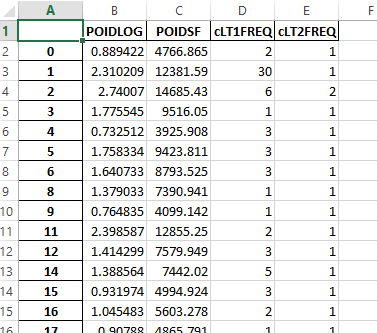

In [ ]:
from IPython.display import Image
Image("td10exc.png")

<h3 id="qu">Questions</h3>

* **Que changerait l'ajout du paramètre ``how='outer'`` dans ce cas ?**
* **On cherche à joindre deux tables A,B qui ont chacune trois clés distinctes : $c_1, c_2, c_3$. Il y a respectivement dans chaque table $A_i$ et $B_i$ lignes pour la clé $c_i$. Combien la table finale issue de la fusion des deux tables contiendra-t-elle de lignes ?**

L'ajout du paramètres ``how='outer'`` ne changerait rien dans ce cas car les deux tables fusionnées contiennent exactement les mêmes clés.

Le nombre de lignes obtenus serait $\sum_{i=1}^{3} A_i B_i$. Il y a trois clés, chaque ligne de la table A doit être associée à toutes les lignes de la table B partageant la même clé.

<h3 id="exo3">Exercice 2 : lambda fonction</h3>

Ecrire une lambda fonction qui prend deux paramètres et qui est équivalente à la fonction suivante :

In [ ]:
def delta(x,y):
    return max(x,y)- min(x,y)

In [ ]:
delta = lambda x,y : max(x,y)- min(x,y)

In [ ]:
delta(4,5)

1

In [ ]:
import random 
df["select"]= df.apply( lambda row : random.randint(1,10), axis=1) 
echantillon = df [ df["select"] ==1 ]
echantillon.shape, df.shape

((851, 5), (8403, 5))

<h3 id="exo2">Exercice 3 : moyennes par groupes</h3>
    
Toujours avec le même jeu de données ([marathon.txt](http://www.xavierdupre.fr/enseignement/complements/marathon.txt)), on veut ajouter une ligne à la fin du tableau croisé dynamique contenant la moyenne en secondes des temps des marathons pour chaque ville.

In [ ]:
from ensae_teaching_cs.data import marathon
import pandas
df = pandas.read_csv(marathon(), sep="\t", names=["ville", "annee", "temps","secondes"])
df.head()

,ville,annee,temps,secondes
0,PARIS,2011,02:06:29,7589
1,PARIS,2010,02:06:41,7601
2,PARIS,2009,02:05:47,7547
3,PARIS,2008,02:06:40,7600
4,PARIS,2007,02:07:17,7637


La solution requiert trois étapes.

1. Pour avoir la moyenne par villes, il faut grouper les lignes associées à la même villes.
2. Ensuite, il faut introduire ces moyennes dans la table initiale : on fusionne.
3. On effectue le même pivot que dans l'énoncé.

In [ ]:
# étape 1
# par défaut, la méthode groupby utilise la clé de group comme index
# pour ne pas le faire, il faut préciser as_index = False
gr = df[["ville","secondes"]].groupby("ville", as_index=False).mean()
gr.head()

,ville,secondes
0,AMSTERDAM,7883.371429
1,BERLIN,7922.315789
2,BOSTON,7891.061224
3,CHICAGO,7815.909091
4,FUKUOKA,8075.187500


In [ ]:
# étape 2 - on ajoute une colonne
tout = df.merge( gr, on="ville")
tout.head()

,ville,annee,temps,secondes_x,secondes_y
0,PARIS,2011,02:06:29,7589,7937.028571
1,PARIS,2010,02:06:41,7601,7937.028571
2,PARIS,2009,02:05:47,7547,7937.028571
3,PARIS,2008,02:06:40,7600,7937.028571
4,PARIS,2007,02:07:17,7637,7937.028571


In [ ]:
# étape 3
piv = tout.pivot("annee","ville","secondes_x")
piv.tail()

ville,AMSTERDAM,BERLIN,BOSTON,CHICAGO,FUKUOKA,LONDON,NEW YORK,PARIS,STOCKOLM
annee,,,,,,,,,
2007,7589.0,7466.0,8053.0,7871.0,7599.0,7661.0,7744.0,7637.0,8456.0
2008,7672.0,7439.0,7665.0,7585.0,7570.0,7515.0,7723.0,7600.0,8163.0
2009,7578.0,7568.0,7722.0,7541.0,7518.0,7510.0,7755.0,7547.0,8134.0
2010,7544.0,7508.0,7552.0,7583.0,7704.0,7519.0,7694.0,7601.0,7968.0
2011,NaN,7418.0,7382.0,NaN,NaN,7480.0,NaN,7589.0,8047.0


A partir de là, on ne voit pas trop comment s'en sortir. Voici ce que je propose :

1. On effectue un pivot sur la petite matrice des moyennes.
2. On ajoute ce second pivot avec le premier (celui de l'énoncé).

In [ ]:
gr["annee"] = "moyenne"
pivmean = gr.pivot("annee","ville","secondes")
pivmean

ville,AMSTERDAM,BERLIN,BOSTON,CHICAGO,FUKUOKA,LONDON,NEW YORK,PARIS,STOCKOLM
annee,,,,,,,,,
moyenne,7883.371429,7922.315789,7891.061224,7815.909091,8075.1875,7695.16129,7928.560976,7937.028571,8133.393939


In [ ]:
piv = df.pivot("annee","ville","secondes")
pandas.concat( [ piv, pivmean ]).tail()

ville,AMSTERDAM,BERLIN,BOSTON,CHICAGO,FUKUOKA,LONDON,NEW YORK,PARIS,STOCKOLM
annee,,,,,,,,,
2008,7672.000000,7439.000000,7665.000000,7585.000000,7570.0000,7515.00000,7723.000000,7600.000000,8163.000000
2009,7578.000000,7568.000000,7722.000000,7541.000000,7518.0000,7510.00000,7755.000000,7547.000000,8134.000000
2010,7544.000000,7508.000000,7552.000000,7583.000000,7704.0000,7519.00000,7694.000000,7601.000000,7968.000000
2011,NaN,7418.000000,7382.000000,NaN,NaN,7480.00000,NaN,7589.000000,8047.000000
moyenne,7883.371429,7922.315789,7891.061224,7815.909091,8075.1875,7695.16129,7928.560976,7937.028571,8133.393939


En résumé, cela donne (j'ajoute aussi le nombre de marathons courus) :

In [ ]:
import pandas, urllib.request
from ensae_teaching_cs.data import marathon
df = pandas.read_csv(marathon(filename=True), 
                     sep="\t", names=["ville", "annee", "temps","secondes"])
piv = df.pivot("annee","ville","secondes")
gr = df[["ville","secondes"]].groupby("ville", as_index=False).mean()
gr["annee"] = "moyenne"
pivmean = gr.pivot("annee","ville","secondes")

pandas.concat([piv, pivmean]).tail()

ville,AMSTERDAM,BERLIN,BOSTON,CHICAGO,FUKUOKA,LONDON,NEW YORK,PARIS,STOCKOLM
annee,,,,,,,,,
2008,7672.000000,7439.000000,7665.000000,7585.000000,7570.0000,7515.00000,7723.000000,7600.000000,8163.000000
2009,7578.000000,7568.000000,7722.000000,7541.000000,7518.0000,7510.00000,7755.000000,7547.000000,8134.000000
2010,7544.000000,7508.000000,7552.000000,7583.000000,7704.0000,7519.00000,7694.000000,7601.000000,7968.000000
2011,NaN,7418.000000,7382.000000,NaN,NaN,7480.00000,NaN,7589.000000,8047.000000
moyenne,7883.371429,7922.315789,7891.061224,7815.909091,8075.1875,7695.16129,7928.560976,7937.028571,8133.393939


<h3 id="exo4">Exercice 4 : écart entre les mariés</h3>

1. En ajoutant une colonne et en utilisant l'opération [group by](http://pandas.pydata.org/pandas-docs/stable/groupby.html), on veut obtenir la distribution du nombre de mariages en fonction de l'écart entre les mariés. Au besoin, on changera le type d'une colone ou deux.
2. On veut tracer un nuage de points avec en abscisse l'âge du mari, en ordonnée, l'âge de la femme. Il faudra peut-être jeter un coup d'oeil sur la documentation de la méthode [plot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html).

In [ ]:
import urllib.request
import zipfile

def download_and_save(name, root_url):
    try:
        response = urllib.request.urlopen(root_url+name)
    except (TimeoutError, urllib.request.URLError):
        # back up plan
        root_url = "http://www.xavierdupre.fr/enseignement/complements/"
        response = urllib.request.urlopen(root_url+name)
    with open(name, "wb") as outfile:
        outfile.write(response.read())

def unzip(name):
    with zipfile.ZipFile(name, "r") as z:
        z.extractall(".")

filenames = ["etatcivil2012_mar2012_dbase.zip", 
             "etatcivil2012_nais2012_dbase.zip",
             "etatcivil2012_dec2012_dbase.zip", ]
root_url = 'http://telechargement.insee.fr/fichiersdetail/etatcivil2012/dbase/'

for filename in filenames:
    download_and_save(filename, root_url)
    unzip(filename)
    print("Download of {}: DONE!".format(filename))

Download of etatcivil2012_mar2012_dbase.zip: DONE!
Download of etatcivil2012_nais2012_dbase.zip: DONE!
Download of etatcivil2012_dec2012_dbase.zip: DONE!


In [ ]:
import pandas
try:
    from dbfread_ import DBF
    use_dbfread = True
except ImportError as e :
    use_dbfread = False
    
if use_dbfread:
    print("use of dbfread")
    def dBase2df(dbase_filename):
        table = DBF(dbase_filename, load=True, encoding="cp437")
        return pandas.DataFrame(table.records)

    df = dBase2df('mar2012.dbf')
else :
    print("use of zipped version")
    import pyensae
    data = pyensae.download_data("mar2012.zip")
    df = pandas.read_csv(data[0], sep="\t", encoding="utf8", low_memory=False)  
    
print(df.shape, df.columns)
df.head()

use of zipped version
(246123, 16) Index(['AMAR', 'ANAISF', 'ANAISH', 'DEPDOM', 'DEPMAR', 'DEPNAISF', 'DEPNAISH',
       'ETAMATF', 'ETAMATH', 'INDNATF', 'INDNATH', 'JSEMAINE', 'MMAR',
       'NBENFCOM', 'TUCOM', 'TUDOM'],
      dtype='object')


,AMAR,ANAISF,ANAISH,DEPDOM,DEPMAR,DEPNAISF,DEPNAISH,ETAMATF,ETAMATH,INDNATF,INDNATH,JSEMAINE,MMAR,NBENFCOM,TUCOM,TUDOM
0,2012,1984,1982,99,29,99,75,1,1,2,1,1,1,N,NaN,9
1,2012,1969,1956,99,75,99,69,4,4,2,2,3,1,N,NaN,9
2,2012,1992,1982,99,34,99,99,1,1,1,2,5,1,N,NaN,9
3,2012,1987,1985,99,13,84,99,1,1,1,2,4,1,N,NaN,9
4,2012,1963,1968,99,26,99,99,1,1,2,2,6,1,N,NaN,9


In [ ]:
df["ageH"] = df.apply (lambda r:  2014 - int(r["ANAISH"]), axis=1)
df["ageF"] = df.apply (lambda r:  2014 - int(r["ANAISF"]), axis=1)
df.head()

,AMAR,ANAISF,ANAISH,DEPDOM,DEPMAR,DEPNAISF,DEPNAISH,ETAMATF,ETAMATH,INDNATF,INDNATH,JSEMAINE,MMAR,NBENFCOM,TUCOM,TUDOM,ageH,ageF
0,2012,1984,1982,99,29,99,75,1,1,2,1,1,1,N,NaN,9,32,30
1,2012,1969,1956,99,75,99,69,4,4,2,2,3,1,N,NaN,9,58,45
2,2012,1992,1982,99,34,99,99,1,1,1,2,5,1,N,NaN,9,32,22
3,2012,1987,1985,99,13,84,99,1,1,1,2,4,1,N,NaN,9,29,27
4,2012,1963,1968,99,26,99,99,1,1,2,2,6,1,N,NaN,9,46,51


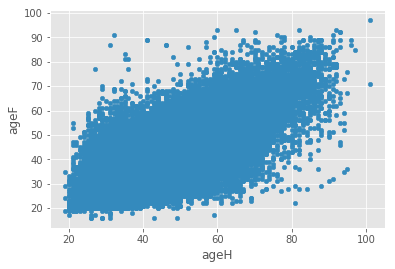

In [ ]:
df.plot(x="ageH",y="ageF", kind="scatter")

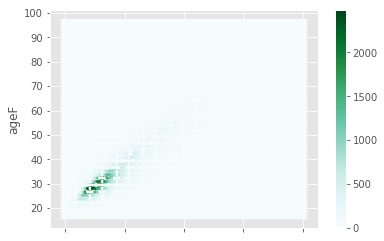

In [ ]:
df.plot(x="ageH",y="ageF", kind="hexbin")

<h3 id="exo5">Exercice 5 : graphe de la distribution avec pandas</h3>

Le module ``pandas`` propose un panel de graphiques standard faciles à obtenir. On souhaite représenter la distribution sous forme d'histogramme. A vous de choisir le meilleure graphique depuis la page [Visualization](http://pandas.pydata.org/pandas-docs/stable/visualization.html).

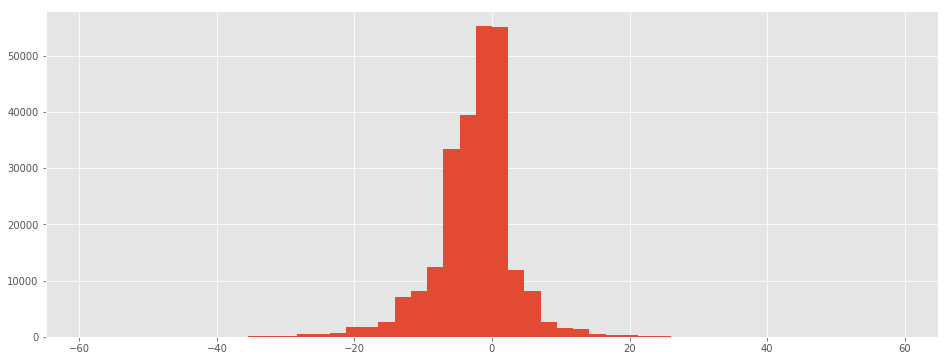

In [ ]:
df["ANAISH"] = df.apply (lambda r:  int(r["ANAISH"]), axis=1)
df["ANAISF"] = df.apply (lambda r:  int(r["ANAISF"]), axis=1)
df["differenceHF"] = df.ANAISH - df.ANAISF
df["nb"] = 1
dist = df[["nb","differenceHF"]].groupby("differenceHF", as_index=False).count()
df["differenceHF"].hist(figsize=(16,6), bins=50)

<h3 id="exo6">Exercice 6 : distribution des mariages par jour</h3>
    
On veut obtenir un graphe qui contient l'histogramme de la distribution du nombre de mariages par jour de la semaine et d'ajouter une seconde courbe correspond avec un second axe à la répartition cumulée.


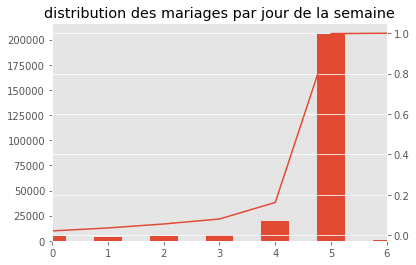

In [ ]:
df["nb"] = 1
dissem = df[["JSEMAINE","nb"]].groupby("JSEMAINE",as_index=False).sum()
total = dissem["nb"].sum()
repsem = dissem.cumsum() 
repsem["nb"] /= total

ax = dissem["nb"].plot(kind="bar")
repsem["nb"].plot(ax=ax, secondary_y=True)
ax.set_title("distribution des mariages par jour de la semaine")